In [1]:
# Ziel: die Beziehung zwischen der Fidelity und der 
# Geschwindigkeit von QFP-Annealing zu untersuchen.
# 3.1 (S.25ff) in der Masterarbeit_071020

%matplotlib inline
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.stats import norm
import matplotlib.cm as cm
import random
import cmath

In [2]:
# Parameter

xi = .4 #GHz
m = 1/(4 * xi**2)
omega_qfp = 2 * xi

#tqfp = np.pi/(2*omega_qfp)
varphi_c = np.pi/2

In [3]:
def varphi_p(beta_max, varphi_x, lamb):
    
    func = lambda varphi: varphi - beta_max*np.sin(varphi_x/2)*np.sin(varphi) - lamb
    varphi_0 = 1
    varphip, = fsolve(func, varphi_0)
    
    return varphip

In [4]:
def fid(beta_max, rde, rop, rtm):
    
    omega=rop*omega_qfp
    tqfp = np.pi/(2*omega)
    
    v = beta_max/tqfp
    
    t = rtm*tqfp
    
    theta_q = np.arctan(rde)
    
    varphi_x = np.heaviside(tqfp-t, 0.5) * v * t + np.heaviside(t-tqfp, 0.5)* varphi_c
    
    lamb = 0.1*omega_qfp*t*np.heaviside(tqfp-t, 0.5) + np.heaviside(t-tqfp, 0.5)* 0.1*omega_qfp
    vp = varphi_p(beta_max, varphi_x, lamb)
    vptilde = complex(np.cos(theta_q), -np.sin(theta_q))*varphi_p(beta_max, varphi_x, lamb)
    
    sigma = 1/ cmath.sqrt(2*m*omega_qfp * cmath.sqrt(1-beta_max*np.sin(varphi_x/2)*np.cos(vp)))
    sigmatilde = 1/ cmath.sqrt(2*m*omega_qfp * cmath.sqrt(1-beta_max*np.sin(varphi_x/2)*np.cos(vptilde)))
        
    F = norm.cdf(np.abs(vp/sigma))
    Ftilde = norm.cdf(np.abs(vptilde/sigmatilde)) # hier ist np.abs benutzt.
    
    F_r = norm.cdf((vp/sigma).real)  
    Ftilde_r = norm.cdf((vptilde/sigmatilde).real) # hier ist Realteil.
    
    F_i = norm.cdf((vp/sigma).imag)
    Ftilde_i = norm.cdf((vptilde/sigmatilde).imag) # hier ist Imaginärteil.

    return (F, Ftilde)

In [5]:
rtm_list = np.linspace(.01, 1, 50)
(beta_max, rde, rop) = (2.5, 1, 1)
F_rtm = [fid(beta_max, rde, rop, rtm) for rtm in rtm_list]

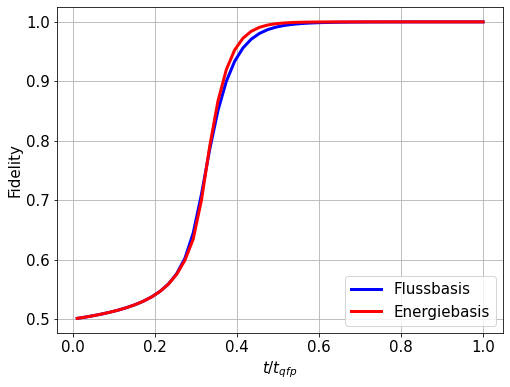

In [7]:
from pylab import rcParams
rcParams.update({'font.size': 15})
rcParams['figure.figsize'] = 8, 6
fig, ax = plt.subplots()
ax.plot(rtm_list, [f[0] for f in F_rtm], 'b', label='Flussbasis', linewidth=3)
ax.plot(rtm_list, [f[1] for f in F_rtm], 'r', label='Energiebasis', linewidth=3)
#ax.set_xlim(0,1)
ax.set_xlabel(r"$ t/t_{qfp}$")
ax.set_ylabel('Fidelity')
ax.legend(loc=4)
ax.grid(True)
#ax.set_title(r'Fidelity und $t/t_{qfp}$ mit $t_{qfp}=\pi/(2\omega)$ dem Endzeitpunkt ' '\n' ' von QFP-Annealing, wobei $\omega$ die Geschwindigkeit ' '\n' ' von QFP Annealing ist')

plt.savefig('an_t.pdf')